# Analysizing the sales data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "../datasets/Sales Dataset.csv"
df = pd.read_csv( path )

In [3]:
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [4]:
df.columns

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City',
       'Year-Month'],
      dtype='object')

# rename the columns of the dataset

In [5]:
df.rename( columns={
    'Order ID':'order_id',
    'Amount' : 'amount',
    'Profit' : 'profit',
    'Quantity' : 'quantity',
    'Category' : 'category',
    'Sub-Category' : 'sub_category',
    'PaymentMode' : 'payment_mode',
    'Order Date' : 'order_date',
    'CustomerName' : 'customer_name',
    'State': 'state',
    'City' : 'city',
    'Year-Month':'year_month' 
} , inplace=True )

df.head()

,order_id,amount,profit,quantity,category,sub_category,payment_mode,order_date,customer_name,state,city,year_month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [6]:
df.head(10)

,order_id,amount,profit,quantity,category,sub_category,payment_mode,order_date,customer_name,state,city,year_month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
5,B-26776,4975,1330,14,Electronics,Printers,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
6,B-26942,1525,185,12,Office Supplies,Pens,Debit Card,2024-05-11,John Fields,Florida,Orlando,2024-05
7,B-26942,1525,185,12,Office Supplies,Pens,Debit Card,2021-10-09,Clayton Smith,Florida,Miami,2021-10
8,B-26640,883,117,10,Electronics,Laptops,EMI,2022-11-18,Richard Kelley,California,Los Angeles,2022-11
9,B-26640,8127,3551,16,Furniture,Tables,Credit Card,2022-11-18,Richard Kelley,California,Los Angeles,2022-11


In [7]:
df.shape

(1194, 12)

# check for the missing values

In [8]:
df.isnull().sum()

order_id         0
amount           0
profit           0
quantity         0
category         0
sub_category     0
payment_mode     0
order_date       0
customer_name    0
state            0
city             0
year_month       0
dtype: int64

# Group By

In [9]:
payment_mode_grp = df.groupby(by='payment_mode')

In [10]:
for group_name, group_df in payment_mode_grp:
    print("Group:", group_name)
    print(group_df)

Group: COD
     order_id  amount  profit  quantity         category sub_category  \
16    B-25238    7501     262        18  Office Supplies        Paper   
22    B-25104    2939     894        20  Office Supplies      Binders   
25    B-25553    4080      72        17  Office Supplies        Paper   
27    B-26232    5219    1180        20  Office Supplies      Binders   
28    B-26232    5219    1180        20  Office Supplies      Binders   
...       ...     ...     ...       ...              ...          ...   
1148  B-26120    2101     287         8  Office Supplies         Pens   
1149  B-26120    2101     287         8  Office Supplies         Pens   
1168  B-25436    8044    3634         3  Office Supplies      Markers   
1169  B-25436    8044    3634         3  Office Supplies      Markers   
1170  B-25794    7417    1334        16        Furniture    Bookcases   

     payment_mode  order_date      customer_name       state           city  \
16            COD  2023-11-09    

In [62]:
payment_mode_grp.count()

,order_id,amount,profit,quantity,category,sub_category,order_date,customer_name,state,city,year_month
payment_mode,,,,,,,,,,,
COD,206,206,206,206,206,206,206,206,206,206,206
Credit Card,258,258,258,258,258,258,258,258,258,258,258
Debit Card,260,260,260,260,260,260,260,260,260,260,260
EMI,218,218,218,218,218,218,218,218,218,218,218
UPI,252,252,252,252,252,252,252,252,252,252,252


In [12]:
payment_mode_grp['amount'].sum()

payment_mode
COD            1141790
Credit Card    1281044
Debit Card     1395035
EMI            1114297
UPI            1250473
Name: amount, dtype: int64

In [13]:
print( payment_mode_grp['profit'].mean() )

payment_mode
COD            1241.475728
Credit Card    1354.232558
Debit Card     1445.080769
EMI            1357.573394
UPI            1324.956349
Name: profit, dtype: float64


In [14]:
print( payment_mode_grp['amount'].agg(['count', 'sum','mean'])  )

              count      sum         mean
payment_mode                             
COD             206  1141790  5542.669903
Credit Card     258  1281044  4965.286822
Debit Card      260  1395035  5365.519231
EMI             218  1114297  5111.454128
UPI             252  1250473  4962.194444


In [15]:
counts = payment_mode_grp['order_id'].count().to_dict()
amounts = payment_mode_grp['amount'].sum().to_dict()

# Plot the pie chart for payment mode

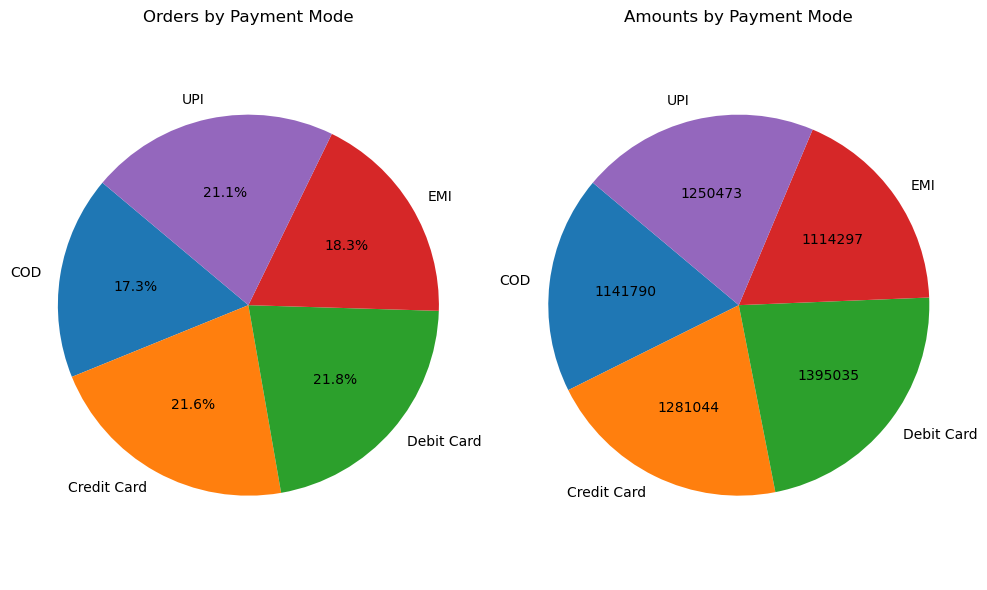

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))  # 1 row, 2 columns

# First pie chart: Order counts 
axes[0].pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', startangle=140)
axes[0].set_title('Orders by Payment Mode')
axes[0].axis('equal')

# Custom function to display actual values
def show_actual_values(pct, all_vals):
    total = sum(all_vals)
    absolute = int(round(pct/100 * total))
    return f'{absolute}'

# Second pie chart: Amounts with actual value labels
amount_vals = list(amounts.values())

axes[1].pie(
    amount_vals,
    labels=amounts.keys(),
    autopct=lambda pct: show_actual_values(pct, amount_vals),
    startangle=140
)
axes[1].set_title('Amounts by Payment Mode')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

# Category wise analysis

In [17]:
category_grp = df.groupby('category')

counts = category_grp['order_id'].count().to_dict()

In [18]:
types = list( counts.keys() )
type_values = list( counts.values() )

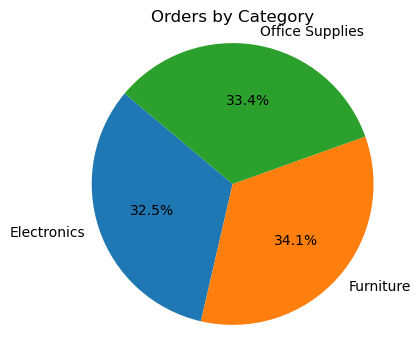

In [19]:
plt.figure(figsize=(4,4))
plt.pie(type_values, labels=types, autopct='%1.1f%%', startangle=140)
plt.title('Orders by Category')
plt.axis('equal')
plt.show()

# State wise analysis

In [34]:
state_group = df.groupby("state")
counts = state_group['order_id'].count().to_dict()

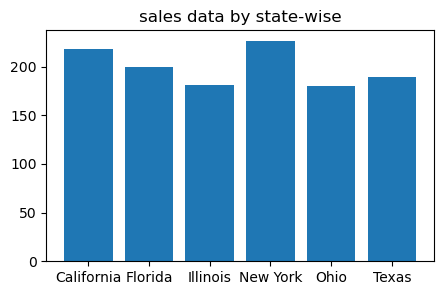

In [41]:
plt.figure(figsize=(5,3))
plt.bar( x=list(counts.keys()) , height=list(counts.values()) )
plt.title("sales data by state-wise")
plt.show()

# State and category wise analysis

In [32]:
state_category_group = df.groupby( ['state','category'])
counts = state_category_group['order_id'].count().to_dict()

In [21]:
counts

{('California', 'Electronics'): 56,
 ('California', 'Furniture'): 83,
 ('California', 'Office Supplies'): 79,
 ('Florida', 'Electronics'): 71,
 ('Florida', 'Furniture'): 62,
 ('Florida', 'Office Supplies'): 67,
 ('Illinois', 'Electronics'): 55,
 ('Illinois', 'Furniture'): 56,
 ('Illinois', 'Office Supplies'): 70,
 ('New York', 'Electronics'): 71,
 ('New York', 'Furniture'): 82,
 ('New York', 'Office Supplies'): 73,
 ('Ohio', 'Electronics'): 56,
 ('Ohio', 'Furniture'): 65,
 ('Ohio', 'Office Supplies'): 59,
 ('Texas', 'Electronics'): 79,
 ('Texas', 'Furniture'): 59,
 ('Texas', 'Office Supplies'): 51}

In [22]:
from collections import defaultdict
from math import ceil

In [23]:
state_data = defaultdict(dict)
for (state, category), value in counts.items():
    state_data[state][category] = value

In [24]:
state_data

defaultdict(dict,
            {'California': {'Electronics': 56,
              'Furniture': 83,
              'Office Supplies': 79},
             'Florida': {'Electronics': 71,
              'Furniture': 62,
              'Office Supplies': 67},
             'Illinois': {'Electronics': 55,
              'Furniture': 56,
              'Office Supplies': 70},
             'New York': {'Electronics': 71,
              'Furniture': 82,
              'Office Supplies': 73},
             'Ohio': {'Electronics': 56,
              'Furniture': 65,
              'Office Supplies': 59},
             'Texas': {'Electronics': 79,
              'Furniture': 59,
              'Office Supplies': 51}})

In [25]:
for (state,category) in state_data.items():
    print(state,category)

California {'Electronics': 56, 'Furniture': 83, 'Office Supplies': 79}
Florida {'Electronics': 71, 'Furniture': 62, 'Office Supplies': 67}
Illinois {'Electronics': 55, 'Furniture': 56, 'Office Supplies': 70}
New York {'Electronics': 71, 'Furniture': 82, 'Office Supplies': 73}
Ohio {'Electronics': 56, 'Furniture': 65, 'Office Supplies': 59}
Texas {'Electronics': 79, 'Furniture': 59, 'Office Supplies': 51}


In [26]:
# Plot
num_states = len(state_data)
num_cols = 3  # number of plots per row
num_rows = ceil(num_states / num_cols)  

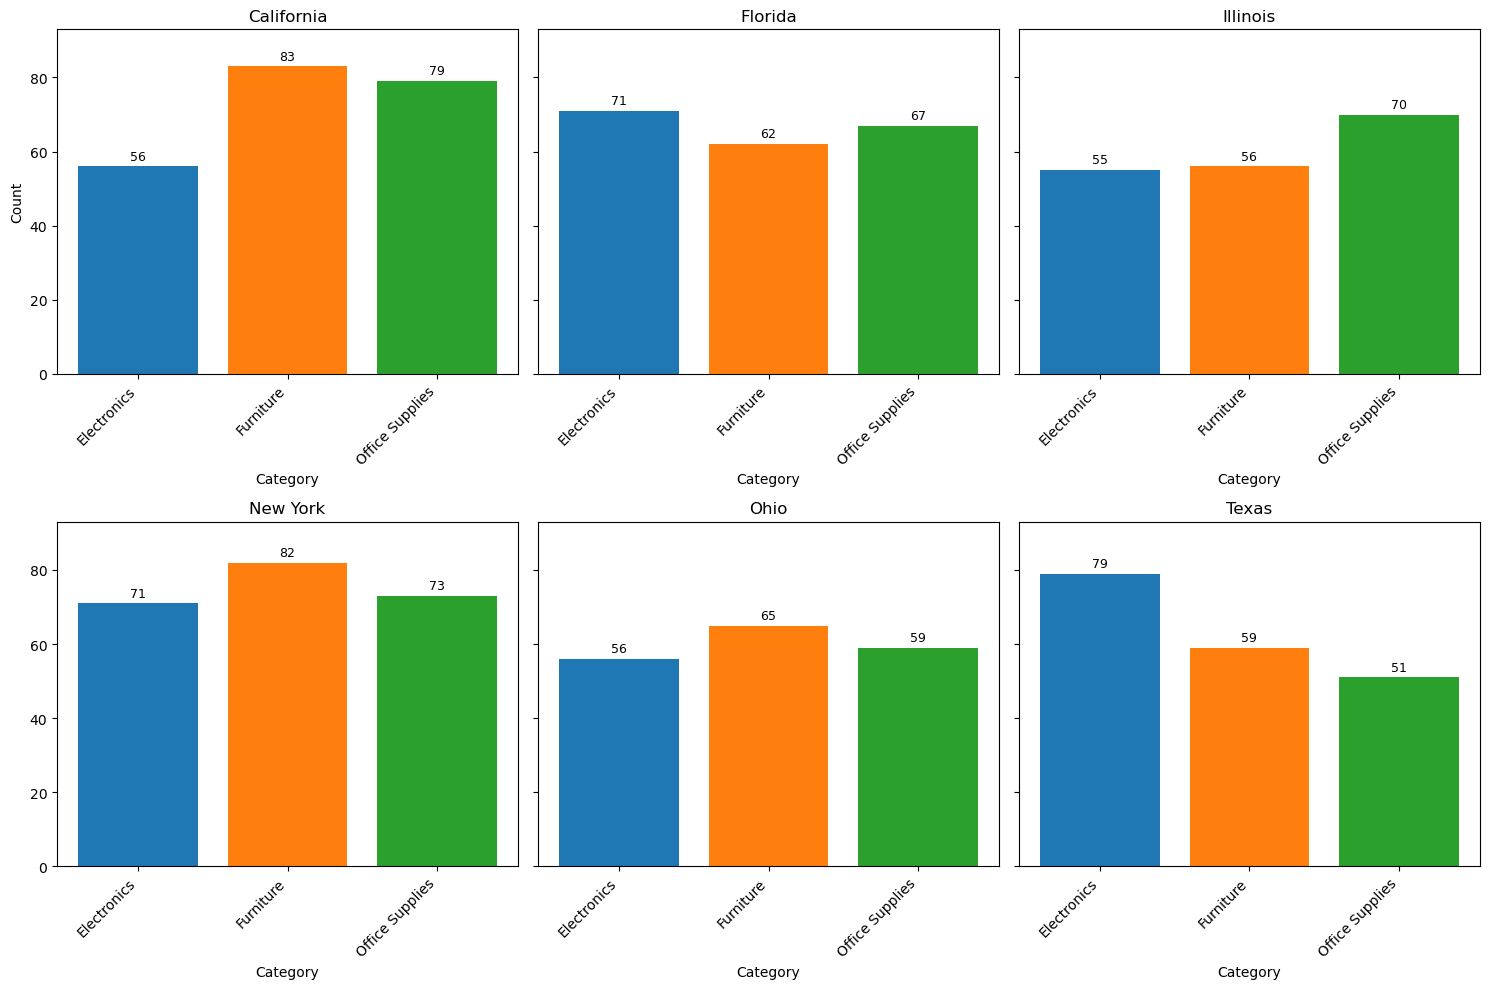

In [27]:
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10), sharey=True)
axes = axes.flatten()

# Define a color for each category (consistent across all states)
category_colors = {
    'Electronics': '#1f77b4',      # blue
    'Furniture': '#ff7f0e',        # orange
    'Office Supplies': '#2ca02c'   # green
}

for ax, (state, categories) in zip(axes, state_data.items()):
    category_names = list(categories.keys())
    category_values = list(categories.values())
    colors = [category_colors[cat] for cat in category_names]

    bars = ax.bar(category_names, category_values, color=colors)
    ax.set_title(state)
    ax.set_xlabel('Category')
    ax.set_xticklabels(category_names, rotation=45, ha='right')
    ax.set_ylim(0, max(counts.values()) + 10)

    # Annotate each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, str(height),
                ha='center', va='bottom', fontsize=9)

# Remove extra axes if any
for i in range(len(state_data), len(axes)):
    fig.delaxes(axes[i])

axes[0].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [28]:
state_group = df.groupby( ['state','sub_category'])
counts = state_group['order_id'].count().to_dict()

In [29]:
state_data = defaultdict(dict)
for (state, category), value in counts.items():
    state_data[state][category] = value

In [30]:
# Plot
num_states = len(state_data)
num_cols = 3  # number of plots per row
num_rows = ceil(num_states / num_cols)  

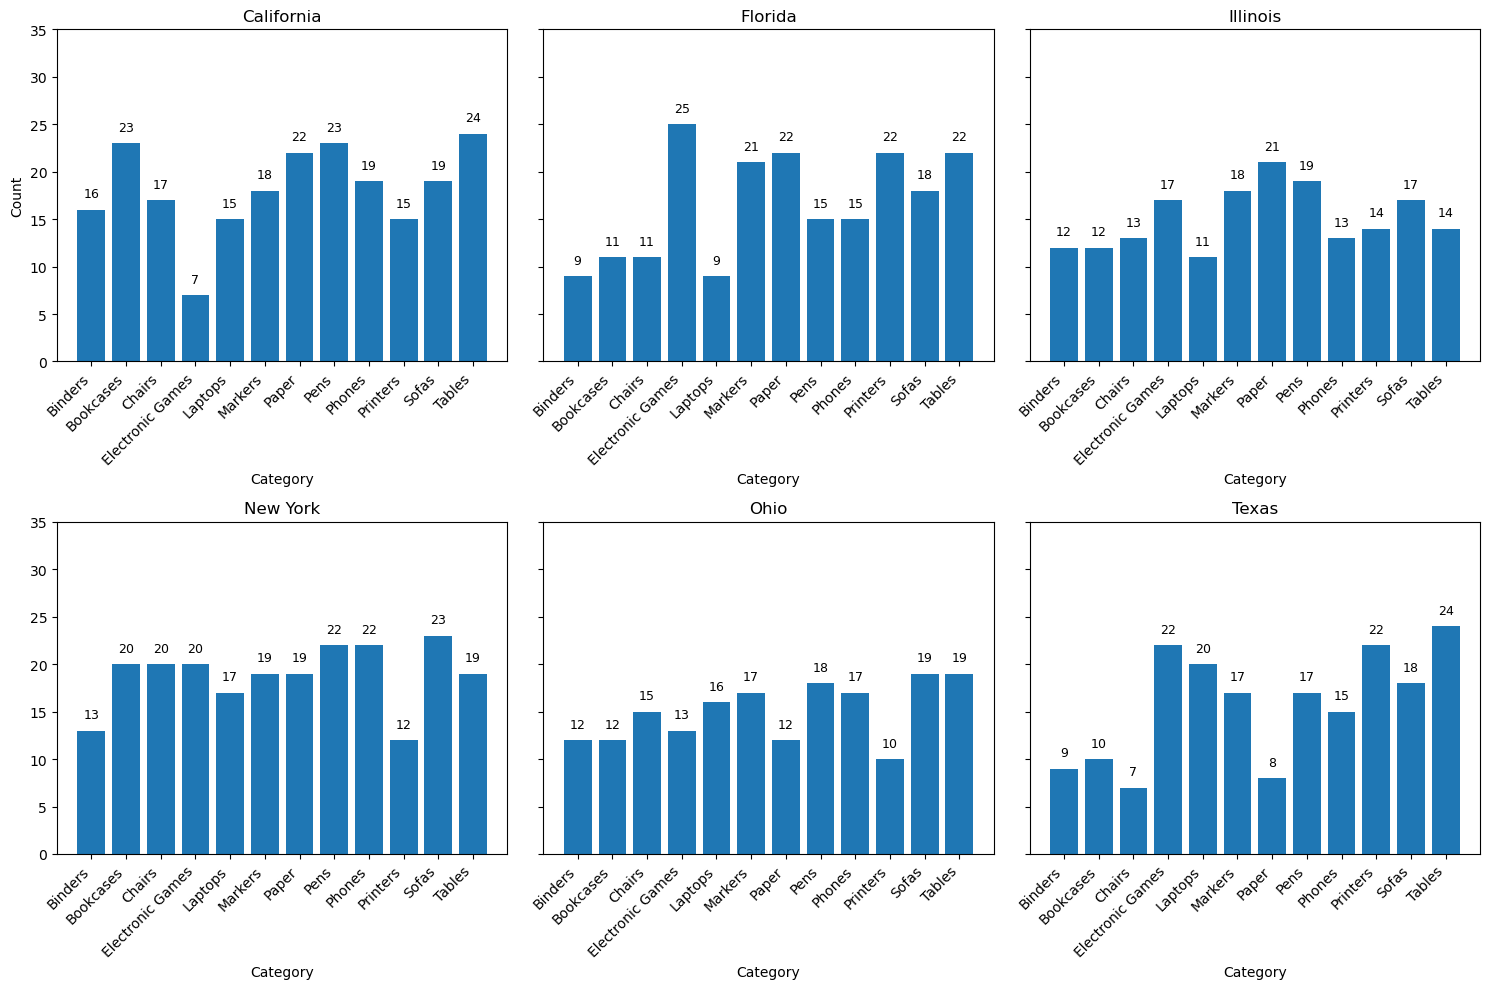

In [31]:
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10), sharey=True)
axes = axes.flatten()

for ax, (state, categories) in zip(axes, state_data.items()):
    category_names = list(categories.keys())
    category_values = list(categories.values())
    # colors = [category_colors[cat] for cat in category_names]

    bars = ax.bar(category_names, category_values)
    ax.set_title(state)
    ax.set_xlabel('Category')
    ax.set_xticklabels(category_names, rotation=45, ha='right')
    ax.set_ylim(0, max(counts.values()) + 10)

    # Annotate each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, str(height),
                ha='center', va='bottom', fontsize=9)

# Remove extra axes if any
for i in range(len(state_data), len(axes)):
    fig.delaxes(axes[i])

axes[0].set_ylabel('Count')
plt.tight_layout()
plt.show()

# Year and month wise analysis

In [50]:
df['year'] = df['year_month'].str.split('-').str[0]
df['year'] = df['year'].astype('int64')

In [52]:
group_year = df.groupby( 'year' )
counts = group_year['order_id'].count()

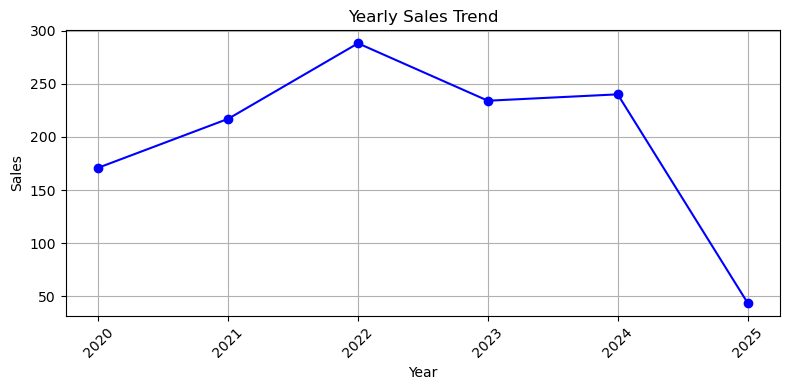

In [76]:
plt.figure(figsize=(8, 4))
plt.plot(counts.index, counts.values, marker='o', linestyle='-', color='blue' )
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [79]:
group_year = df.groupby( 'year_month' )
counts = group_year['order_id'].count()

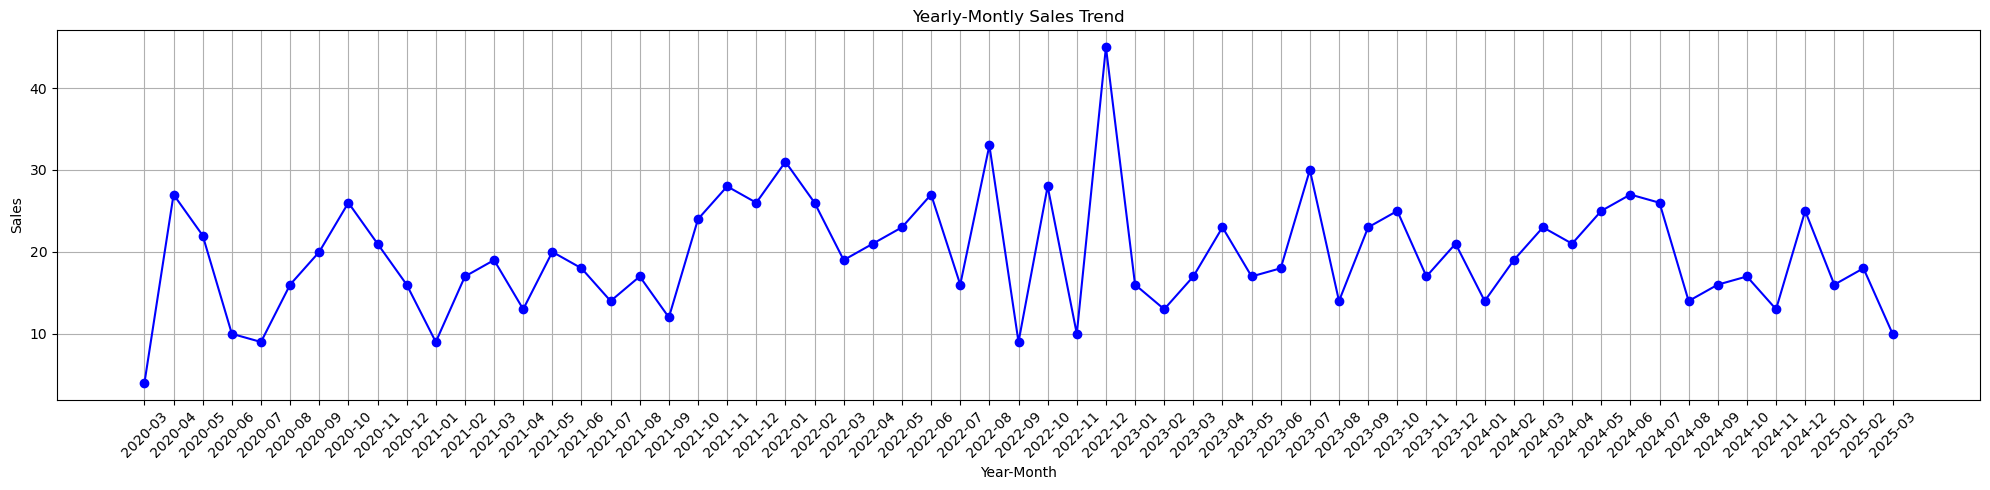

In [89]:
plt.figure(figsize=(20, 5))
plt.plot(counts.index, counts.values, marker='o', linestyle='-', color='blue' )
plt.title('Yearly-Montly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [91]:
df.head()

,order_id,amount,profit,quantity,category,sub_category,payment_mode,order_date,customer_name,state,city,year_month,year
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06,2023
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12,2024
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07,2021
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06,2023
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12,2024


# Product wise analyze

In [95]:
group_sub_category = df.groupby('sub_category')
counts = group_sub_category['quantity'].sum()

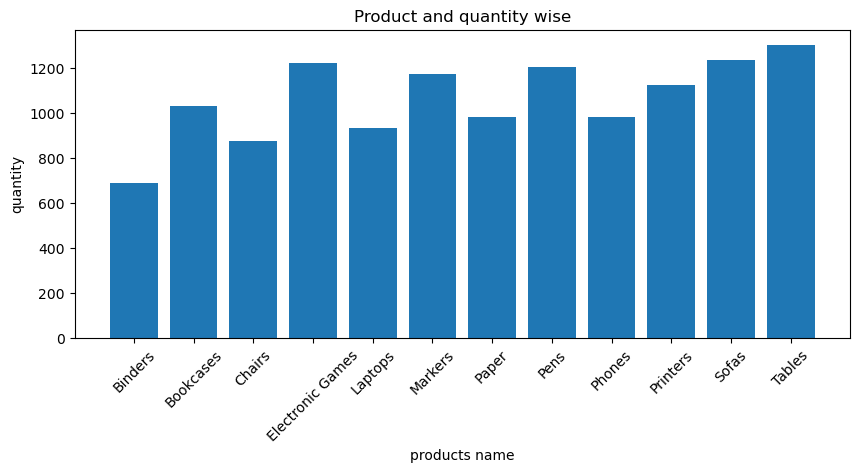

In [112]:
plt.figure(figsize=(10,4))
plt.bar(x=counts.index , height=counts.values)
plt.title("Product and quantity wise")
plt.xlabel("products name")
plt.ylabel("quantity")
plt.xticks(rotation=45)
plt.show()